#### Cleaning and importing data from http://web.mta.info/developers/turnstile.html
The data is collected from July 3, 2021 - Sep 25, 2021

In [2]:
import pandas as pd  
import datetime 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import datetime 


In [3]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210703,210710,210717,210724,210731,210807,210814,210821,210828,210904,210911,210918,210925]
turnstiles_mta = get_data(week_nums) 

In [4]:
turnstiles_mta.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,20:00:00,REGULAR,7593116,2595809
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/27/2021,00:00:00,REGULAR,7593175,2595818
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/27/2021,04:00:00,REGULAR,7593182,2595820
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/27/2021,08:00:00,REGULAR,7593188,2595827
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/27/2021,12:00:00,REGULAR,7593227,2595880


In [5]:
turnstiles_mta.tail(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
210390,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2021,09:00:00,REGULAR,5554,645
210391,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2021,13:00:00,REGULAR,5554,645
210392,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2021,17:00:00,REGULAR,5554,645
210393,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2021,21:00:00,REGULAR,5554,645
210394,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,01:00:00,REGULAR,5554,645
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,05:00:00,REGULAR,5554,645
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,09:00:00,REGULAR,5554,645
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,13:00:00,REGULAR,5554,645
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,17:00:00,REGULAR,5554,646
210399,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,21:00:00,REGULAR,5554,646


In [6]:

turnstiles_mta.info

<bound method DataFrame.info of           C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
0        A002  R051  02-00-00          59 ST  NQR456W      BMT  06/26/2021   
1        A002  R051  02-00-00          59 ST  NQR456W      BMT  06/26/2021   
2        A002  R051  02-00-00          59 ST  NQR456W      BMT  06/26/2021   
3        A002  R051  02-00-00          59 ST  NQR456W      BMT  06/26/2021   
4        A002  R051  02-00-00          59 ST  NQR456W      BMT  06/26/2021   
...       ...   ...       ...            ...      ...      ...         ...   
210395  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  09/24/2021   
210396  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  09/24/2021   
210397  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  09/24/2021   
210398  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  09/24/2021   
210399  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  09/24/2021   

            TIME     DESC  ENTR

In [7]:
# Three months of Data
turnstiles_mta.DATE.value_counts().sort_index()

06/26/2021    29965
06/27/2021    29840
06/28/2021    29814
06/29/2021    29843
06/30/2021    29883
              ...  
09/20/2021    30444
09/21/2021    30082
09/22/2021    30014
09/23/2021    30033
09/24/2021    29899
Name: DATE, Length: 91, dtype: int64

In [8]:
turnstiles_mta.isnull()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
210395,False,False,False,False,False,False,False,False,False,False,False
210396,False,False,False,False,False,False,False,False,False,False,False
210397,False,False,False,False,False,False,False,False,False,False,False
210398,False,False,False,False,False,False,False,False,False,False,False


In [9]:
turnstiles_mta.isnull().any()

C/A                                                                     False
UNIT                                                                    False
SCP                                                                     False
STATION                                                                 False
LINENAME                                                                False
DIVISION                                                                False
DATE                                                                    False
TIME                                                                    False
DESC                                                                    False
ENTRIES                                                                 False
EXITS                                                                   False
dtype: bool

In [10]:
turnstiles_mta.isnull().sum().sum()    # Now I sure there are not any missing values

0

#### Here I create 2 new columns: 
1- DATE_TIME for the time operations .
2- TURNSTILE which is contain all information about the entry door. 

In [11]:
import datetime 

In [12]:
turnstiles_mta["DATE_TIME"]= pd.to_datetime(turnstiles_mta.DATE + " " + turnstiles_mta.TIME, format= "%m/%d/%Y %H:%M:%S")
turnstiles_mta['TURNSTILE'] = turnstiles_mta['C/A'] + '-' + turnstiles_mta['UNIT'] + '-' + turnstiles_mta['SCP']

In [13]:
turnstiles_mta.head()    # As noted two new columns has been created 

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706,2021-06-26 00:00:00,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713,2021-06-26 04:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729,2021-06-26 08:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762,2021-06-26 12:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791,2021-06-26 16:00:00,A002-R051-02-00-00


# Duplicate Entries

In [14]:
mask = ((turnstiles_mta["C/A"] == "A002") &
        (turnstiles_mta["UNIT"] == "R051") & 
        (turnstiles_mta["SCP"] == "02-00-00") & 
        (turnstiles_mta["STATION"] == "59 ST"))

turnstiles_mta[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706,2021-06-26 00:00:00,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713,2021-06-26 04:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729,2021-06-26 08:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762,2021-06-26 12:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791,2021-06-26 16:00:00,A002-R051-02-00-00


In [15]:
mask = ((turnstiles_mta["C/A"] == "R626") & 
(turnstiles_mta["UNIT"] == "R062") & 
(turnstiles_mta["SCP"] == "00-00-00") & 
(turnstiles_mta["STATION"] == "CROWN HTS-UTICA"))

turnstiles_mta[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
202985,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,06/26/2021,00:00:00,REGULAR,15965827,3530006,2021-06-26 00:00:00,R626-R062-00-00-00
202986,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,06/26/2021,04:00:00,REGULAR,15965837,3530017,2021-06-26 04:00:00,R626-R062-00-00-00
202987,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,06/26/2021,08:00:00,REGULAR,15965957,3530026,2021-06-26 08:00:00,R626-R062-00-00-00
202988,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,06/26/2021,12:00:00,REGULAR,15966176,3530050,2021-06-26 12:00:00,R626-R062-00-00-00
202989,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,06/26/2021,16:00:00,REGULAR,15966408,3530102,2021-06-26 16:00:00,R626-R062-00-00-00


In [16]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_mta
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2702968,S101,R070,00-00-02,ST. GEORGE,2021-09-16 08:00:00,2
2702884,S101,R070,00-00-02,ST. GEORGE,2021-09-02 16:00:00,2
2455849,R516,R291,00-00-00,33 ST-RAWSON ST,2021-08-24 16:00:00,2
1390007,N535,R220,00-00-01,CARROLL ST,2021-08-31 16:00:00,2
1389458,N535,R220,00-00-00,CARROLL ST,2021-08-31 16:00:00,2


In [17]:
# On 9/16, we seem to have two entries for same time.  
mask = ((turnstiles_mta["C/A"] == "S101") & 
(turnstiles_mta["UNIT"] == "R070") & 
(turnstiles_mta["SCP"] == "00-00-02") & 
(turnstiles_mta["STATION"] == "ST. GEORGE") &
(turnstiles_mta["DATE_TIME"].dt.date == datetime.datetime(2021, 9, 16).date()))

turnstiles_mta[mask]    # As we see there is a duplicate on the two rows 

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
208237,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/16/2021,00:00:00,RECOVR AUD,1214894,140,2021-09-16 00:00:00,S101-R070-00-00-02
208238,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/16/2021,04:00:00,RECOVR AUD,1214894,140,2021-09-16 04:00:00,S101-R070-00-00-02
208239,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/16/2021,08:00:00,REGULAR,1214965,140,2021-09-16 08:00:00,S101-R070-00-00-02
208240,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/16/2021,08:00:00,RECOVR AUD,1398234,324,2021-09-16 08:00:00,S101-R070-00-00-02
208241,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/16/2021,12:00:00,REGULAR,1398284,324,2021-09-16 12:00:00,S101-R070-00-00-02
208242,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/16/2021,16:00:00,REGULAR,1398302,324,2021-09-16 16:00:00,S101-R070-00-00-02
208243,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/16/2021,20:00:00,REGULAR,1398314,324,2021-09-16 20:00:00,S101-R070-00-00-02


In [18]:
# remove duplicate data  

turnstiles_mta.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)

turnstiles_mta.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)


In [19]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique 
## As noted there is not duplicate data
(turnstiles_mta
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,1
1816191,R139,R031,04-00-00,34 ST-PENN STA,2021-09-05 12:00:00,1
1816193,R139,R031,04-00-00,34 ST-PENN STA,2021-09-05 20:00:00,1
1816194,R139,R031,04-00-00,34 ST-PENN STA,2021-09-06 00:00:00,1
1816195,R139,R031,04-00-00,34 ST-PENN STA,2021-09-06 04:00:00,1


In [20]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_mta = turnstiles_mta.drop(["EXITS", "DESC"], axis=1, errors="ignore") 

In [21]:
turnstiles_mta.columns    # So here I got the new column 

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'ENTRIES',
       'EXITS                                                               ',
       'DATE_TIME', 'TURNSTILE'],
      dtype='object')

In [22]:
print('Descriptions of entries:' )
print(turnstiles_mta['ENTRIES'].describe() )

Descriptions of entries:
count    2.724296e+06
mean     4.148235e+07
std      2.181385e+08
min      0.000000e+00
25%      2.198185e+05
50%      1.396838e+06
75%      5.997923e+06
max      2.147407e+09
Name: ENTRIES, dtype: float64


In [23]:
# check for negative values , number of unqiue TURNSTILE and nulls
print('Number of negative ENTRIES: %d' %len(turnstiles_mta['ENTRIES'][turnstiles_mta['ENTRIES'] < 0]))
print('Number of unqiue TURNSTILE: %d' %len(turnstiles_mta['TURNSTILE'].unique()))
print('Number of NaN rows: %d' %len(turnstiles_mta[turnstiles_mta['ENTRIES'].isnull()]))


Number of negative ENTRIES: 0
Number of unqiue TURNSTILE: 5028
Number of NaN rows: 0


# Daily

In [24]:
turnstiles_daily = (turnstiles_mta
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first()) 
turnstiles_daily.head()


,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,06/26/2021,7593116
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154


In [25]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1))) 
turnstiles_daily.head()  # To get the exact values of entries for each date

<ipython-input-25-5c4054d6a1c0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,06/26/2021,7593116,NaN,NaN
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427,06/26/2021,7593116.0
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979,06/27/2021,7593427.0
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528,06/28/2021,7593979.0
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154,06/29/2021,7594528.0


In [26]:
# Drop the rows for the earliest date in the turnstiles_daily
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True) 
turnstiles_daily.head() 

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427,06/26/2021,7593116.0
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979,06/27/2021,7593427.0
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528,06/28/2021,7593979.0
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154,06/29/2021,7594528.0
5,A002,R051,02-00-00,59 ST,07/01/2021,7595703,06/30/2021,7595154.0


In [27]:
positive_entries_mask = turnstiles_daily["ENTRIES"] > turnstiles_daily["PREV_ENTRIES"]
positive_entries_mask.head() 

1    True
2    True
3    True
4    True
5    True
dtype: bool

In [28]:
turnstiles_daily = turnstiles_daily[positive_entries_mask]
turnstiles_daily.head() #applied mask, this should only have positive counters.  

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427,06/26/2021,7593116.0
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979,06/27/2021,7593427.0
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528,06/28/2021,7593979.0
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154,06/29/2021,7594528.0
5,A002,R051,02-00-00,59 ST,07/01/2021,7595703,06/30/2021,7595154.0


In [29]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
        # Maybe counter is reversed?
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=200000)

393216 1.0
167790157 702266.0
33565227 188178.0
458768 2578.0
393216 728.0
67109632 14.0
16777220 1037157.0
327680 0.0
609994 1021.0
393271 29099.0
50362839 251769.0
393624 11271.0
201331968 798740.0
1089962154 146746170.0
262243 3.0
1189019240 3740789.0
14051313 346213.0
9482240 774522.0
7979566 789214.0
8205884 1278639.0
4006679 635.0
382126 0.0
262144 0.0


In [30]:
turnstiles_daily.sort_values('DAILY_ENTRIES',ascending= False) 

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
303345,R138,R293,00-05-00,34 ST-PENN STA,06/29/2021,589899,06/28/2021,393607.0,196292.0
81710,H039,R375,00-00-00,NEW LOTS,09/10/2021,33565227,09/09/2021,188178.0,188178.0
208765,N414A,R316,01-06-01,FLUSHING AV,07/16/2021,458814,07/15/2021,271001.0,187813.0
451039,S101,R070,00-00-02,ST. GEORGE,09/20/2021,1398813,09/19/2021,1215299.0,183514.0
451035,S101,R070,00-00-02,ST. GEORGE,09/16/2021,1398314,09/15/2021,1214891.0,183423.0
...,...,...,...,...,...,...,...,...,...
417063,R527,R122,00-05-00,90 ST-ELMHURST,09/20/2021,1189019240,09/19/2021,3740789.0,0.0
417243,R528,R097,00-00-00,JUNCTION BLVD,09/18/2021,14051313,09/17/2021,346213.0,0.0
450005,R728,R226,00-05-01,GUN HILL RD,07/21/2021,262144,07/20/2021,0.0,0.0
417334,R528,R097,00-00-01,JUNCTION BLVD,09/18/2021,9482240,09/17/2021,774522.0,0.0


In [32]:
turnstiles_daily['TURNSTILE'] = turnstiles_daily['C/A'] + '-' + turnstiles_daily['UNIT'] + '-' + turnstiles_daily['SCP']

In [33]:
turnstiles_daily.head() 

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427,06/26/2021,7593116.0,311.0,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979,06/27/2021,7593427.0,552.0,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528,06/28/2021,7593979.0,549.0,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154,06/29/2021,7594528.0,626.0,A002-R051-02-00-00
5,A002,R051,02-00-00,59 ST,07/01/2021,7595703,06/30/2021,7595154.0,549.0,A002-R051-02-00-00


In [34]:
turnstiles_daily['WEEK'] = pd.to_datetime(turnstiles_daily['DATE']).dt.day_name()
turnstiles_daily.head()  

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE,WEEK
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427,06/26/2021,7593116.0,311.0,A002-R051-02-00-00,Sunday
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979,06/27/2021,7593427.0,552.0,A002-R051-02-00-00,Monday
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528,06/28/2021,7593979.0,549.0,A002-R051-02-00-00,Tuesday
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154,06/29/2021,7594528.0,626.0,A002-R051-02-00-00,Wednesday
5,A002,R051,02-00-00,59 ST,07/01/2021,7595703,06/30/2021,7595154.0,549.0,A002-R051-02-00-00,Thursday


In [35]:
#This DF finds the TOTAL entries per day, out of 12 weeks of data
turnstiles_daily_agg = (turnstiles_daily[['STATION','DATE','DAILY_ENTRIES','WEEK']]
                        .groupby('WEEK')
                        .sum()
                        .sort_values('DAILY_ENTRIES',ascending=False)
                       )
#MVP 
turnstiles_daily_agg.reset_index() # DAILY_ENTRIES decreases on Saturday and Sunday 

,WEEK,DAILY_ENTRIES
0,Tuesday,27679789.0
1,Friday,27679161.0
2,Wednesday,27577087.0
3,Thursday,26826493.0
4,Monday,24712957.0
5,Saturday,17203454.0
6,Sunday,14837858.0


In [36]:
#Dividing of all the weekdays by 12, since we use 12 weeks of data 
turnstiles_daily_agg_trial = turnstiles_daily_agg.iloc[:]/12 

In [37]:
#Diving Saturday by 12/11 since we only have 11 Saturdays by the given period
turnstiles_daily_agg_trial.loc['Saturday'] = turnstiles_daily_agg_trial.loc['Saturday']*12/11

In [38]:
# This DF has average entries per week day in the last 4 months.
turnstiles_daily_agg_trial

,DAILY_ENTRIES
WEEK,
Tuesday,2.306649e+06
Friday,2.306597e+06
Wednesday,2.298091e+06
Thursday,2.235541e+06
Monday,2.059413e+06
Saturday,1.563950e+06
Sunday,1.236488e+06


In [39]:
turnstiles_daily_agg_trial['byMil'] = (turnstiles_daily_agg_trial['DAILY_ENTRIES']/1000000).round(decimals=2)
turnstiles_daily_agg_trial.reset_index()
turnstiles_daily_agg_trial.drop(columns='DAILY_ENTRIES',inplace=True)
turnstiles_daily_agg_trial 

,byMil
WEEK,
Tuesday,2.31
Friday,2.31
Wednesday,2.30
Thursday,2.24
Monday,2.06
Saturday,1.56
Sunday,1.24


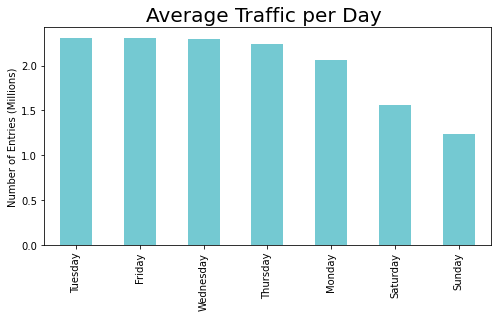

In [40]:
import seaborn as sns 

# average traffic per day 
base_color = sns.color_palette()[0]
#sns.set(style="darkgrid")
g = turnstiles_daily_agg_trial.plot(kind='bar',figsize=(8,4),color='#74C9D2')
plt.title('Average Traffic per Day ',fontdict={'fontsize':20})
plt.xlabel('')
g.get_legend().remove()
plt.ylabel('Number of Entries (Millions)'); #notice here the crowding during the weekdays  in contrast to the weekends

In [43]:
turnstiles_daily['MONTH'] = pd.to_datetime(turnstiles_daily['DATE']).dt.month_name()
turnstiles_daily.head(10) 

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE,WEEK,MONTH
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427,06/26/2021,7593116.0,311.0,A002-R051-02-00-00,Sunday,June
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979,06/27/2021,7593427.0,552.0,A002-R051-02-00-00,Monday,June
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528,06/28/2021,7593979.0,549.0,A002-R051-02-00-00,Tuesday,June
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154,06/29/2021,7594528.0,626.0,A002-R051-02-00-00,Wednesday,June
5,A002,R051,02-00-00,59 ST,07/01/2021,7595703,06/30/2021,7595154.0,549.0,A002-R051-02-00-00,Thursday,July
6,A002,R051,02-00-00,59 ST,07/02/2021,7596330,07/01/2021,7595703.0,627.0,A002-R051-02-00-00,Friday,July
7,A002,R051,02-00-00,59 ST,07/03/2021,7596715,07/02/2021,7596330.0,385.0,A002-R051-02-00-00,Saturday,July
8,A002,R051,02-00-00,59 ST,07/04/2021,7597078,07/03/2021,7596715.0,363.0,A002-R051-02-00-00,Sunday,July
9,A002,R051,02-00-00,59 ST,07/05/2021,7597477,07/04/2021,7597078.0,399.0,A002-R051-02-00-00,Monday,July
10,A002,R051,02-00-00,59 ST,07/06/2021,7598081,07/05/2021,7597477.0,604.0,A002-R051-02-00-00,Tuesday,July


In [44]:
# TOTAL entries per day, out of 4 months of data
turnstiles_monthly_agg = (turnstiles_daily[['STATION','DATE','DAILY_ENTRIES','MONTH']]
                        .groupby('MONTH')
                        .sum()
                        .sort_values('DAILY_ENTRIES',ascending=False)
                       )
 
turnstiles_monthly_agg.reset_index() # June does not count 

,MONTH,DAILY_ENTRIES
0,July,55894318.0
1,August,54774681.0
2,September,48483586.0
3,June,7364214.0


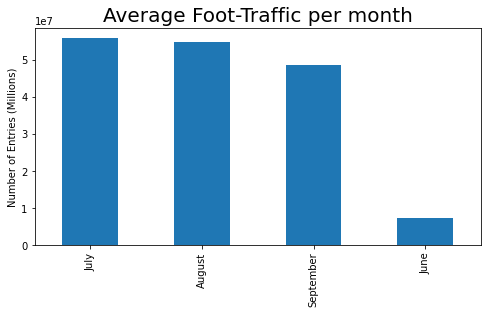

In [45]:
# average traffic per MONTH 
base_color = sns.color_palette()[0]
#sns.set(style="darkgrid")
g = turnstiles_monthly_agg.plot(kind='bar',figsize=(8,4),color=base_color)
plt.title('Average Foot-Traffic per month',fontdict={'fontsize':20})
plt.xlabel('')
g.get_legend().remove()
plt.ylabel('Number of Entries (Millions)'); # June does not count  

In [46]:
turnstiles_daily.head() 

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE,WEEK,MONTH
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427,06/26/2021,7593116.0,311.0,A002-R051-02-00-00,Sunday,June
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979,06/27/2021,7593427.0,552.0,A002-R051-02-00-00,Monday,June
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528,06/28/2021,7593979.0,549.0,A002-R051-02-00-00,Tuesday,June
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154,06/29/2021,7594528.0,626.0,A002-R051-02-00-00,Wednesday,June
5,A002,R051,02-00-00,59 ST,07/01/2021,7595703,06/30/2021,7595154.0,549.0,A002-R051-02-00-00,Thursday,July


In [47]:
#grouping data by stations and data to find a sum of daily entries
stations_daily = (turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum().reset_index())  

stations_daily 

,STATION,DATE,DAILY_ENTRIES
0,1 AV,06/27/2021,6835.0
1,1 AV,06/28/2021,7529.0
2,1 AV,06/29/2021,7231.0
3,1 AV,06/30/2021,7588.0
4,1 AV,07/01/2021,7687.0
...,...,...,...
33942,ZEREGA AV,09/20/2021,1408.0
33943,ZEREGA AV,09/21/2021,1428.0
33944,ZEREGA AV,09/22/2021,1463.0
33945,ZEREGA AV,09/23/2021,1433.0


# Select the busiest station

In [49]:
#grouping the same data above by stations to find of a sum of daily entires for top 10 stations 
top5_stations = (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head())

top5_stations  

61      34 ST-PENN STA
59     34 ST-HERALD SQ
233    GRD CNTRL-42 ST
110              86 ST
46               23 ST
Name: STATION, dtype: object

In [50]:
#changing the format to data frame 
stations_daily_top5 = stations_daily[stations_daily['STATION'].isin(top5_stations)] 

Text(0.5, 1.0, 'Top5 busiest stations')

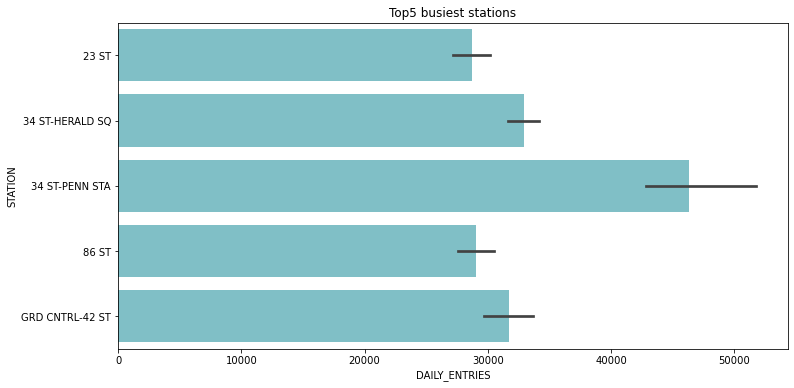

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(data=stations_daily_top5, x ='DAILY_ENTRIES',y='STATION',color='#74C9D2')
plt.title('Top5 busiest stations') 

#### The busiest station in NYC is 34 ST-PENN STA 

In [49]:
turnstiles_daily.head() 

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE,WEEK,MONTH
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427,06/26/2021,7593116.0,311.0,A002-R051-02-00-00,Sunday,June
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979,06/27/2021,7593427.0,552.0,A002-R051-02-00-00,Monday,June
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528,06/28/2021,7593979.0,549.0,A002-R051-02-00-00,Tuesday,June
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154,06/29/2021,7594528.0,626.0,A002-R051-02-00-00,Wednesday,June
5,A002,R051,02-00-00,59 ST,07/01/2021,7595703,06/30/2021,7595154.0,549.0,A002-R051-02-00-00,Thursday,July


#### Select the top 5 of the busiest turnstile for the busiest station '34 ST-PENN STA'  

In [50]:
specific_st=turnstiles_daily[turnstiles_daily['STATION'] == '34 ST-PENN STA'] 
specific_st.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE,WEEK,MONTH
119931,N067,R012,00-00-00,34 ST-PENN STA,06/27/2021,261024,06/26/2021,260820.0,204.0,N067-R012-00-00-00,Sunday,June
119932,N067,R012,00-00-00,34 ST-PENN STA,06/28/2021,261373,06/27/2021,261024.0,349.0,N067-R012-00-00-00,Monday,June
119933,N067,R012,00-00-00,34 ST-PENN STA,06/29/2021,261715,06/28/2021,261373.0,342.0,N067-R012-00-00-00,Tuesday,June
119934,N067,R012,00-00-00,34 ST-PENN STA,06/30/2021,262079,06/29/2021,261715.0,364.0,N067-R012-00-00-00,Wednesday,June
119935,N067,R012,00-00-00,34 ST-PENN STA,07/01/2021,262432,06/30/2021,262079.0,353.0,N067-R012-00-00-00,Thursday,July


In [51]:
#grouping data by stations and data to find a sum of daily entries 
specific_st = (specific_st.groupby(['TURNSTILE','DATE','STATION'])['DAILY_ENTRIES'].sum().reset_index())  

specific_st.head() 

,TURNSTILE,DATE,STATION,DAILY_ENTRIES
0,N067-R012-00-00-00,06/27/2021,34 ST-PENN STA,204.0
1,N067-R012-00-00-00,06/28/2021,34 ST-PENN STA,349.0
2,N067-R012-00-00-00,06/29/2021,34 ST-PENN STA,342.0
3,N067-R012-00-00-00,06/30/2021,34 ST-PENN STA,364.0
4,N067-R012-00-00-00,07/01/2021,34 ST-PENN STA,353.0


In [52]:
#grouping the data  by TURNSTILE to find of a sum of daily entires for top 10 TURNSTILE 
top5_TURNSTILE= (specific_st.groupby(['TURNSTILE'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .TURNSTILE.head())

top5_TURNSTILE 

78    R138-R293-00-05-00
63    R138-R293-00-00-00
64    R138-R293-00-00-01
65    R138-R293-00-00-02
67    R138-R293-00-00-04
Name: TURNSTILE, dtype: object

In [53]:
top5_TURNSTILE = specific_st[specific_st['TURNSTILE'].isin(top5_TURNSTILE)] 

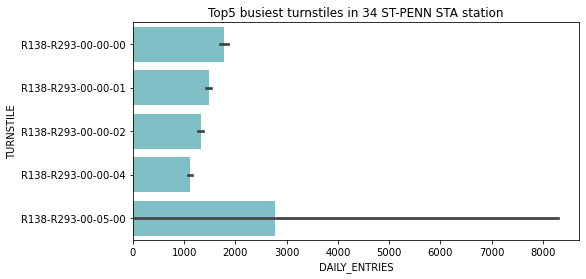

In [54]:
plt.figure(figsize=(8,4))
sns.barplot(data=top5_TURNSTILE, x ='DAILY_ENTRIES',y ='TURNSTILE',color='#74C9D2')
plt.title('Top5 busiest turnstiles in 34 ST-PENN STA station') ;   

In [55]:
turnstiles_daily.head()      

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE,WEEK,MONTH
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427,06/26/2021,7593116.0,311.0,A002-R051-02-00-00,Sunday,June
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979,06/27/2021,7593427.0,552.0,A002-R051-02-00-00,Monday,June
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528,06/28/2021,7593979.0,549.0,A002-R051-02-00-00,Tuesday,June
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154,06/29/2021,7594528.0,626.0,A002-R051-02-00-00,Wednesday,June
5,A002,R051,02-00-00,59 ST,07/01/2021,7595703,06/30/2021,7595154.0,549.0,A002-R051-02-00-00,Thursday,July


In [69]:
single_turnstile1 = turnstiles_daily[(turnstiles_daily["TURNSTILE"] == "R138-R293-00-05-00") & 
(turnstiles_daily["STATION"] == "34 ST-PENN STA")&
(turnstiles_daily["MONTH"] == "July") ]                                  
                            

single_turnstile1.head() 

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE,WEEK,MONTH
303347,R138,R293,00-05-00,34 ST-PENN STA,07/01/2021,589905,06/30/2021,589904.0,1.0,R138-R293-00-05-00,Thursday,July
303348,R138,R293,00-05-00,34 ST-PENN STA,07/02/2021,589906,07/01/2021,589905.0,1.0,R138-R293-00-05-00,Friday,July
303349,R138,R293,00-05-00,34 ST-PENN STA,07/03/2021,589908,07/02/2021,589906.0,2.0,R138-R293-00-05-00,Saturday,July
303350,R138,R293,00-05-00,34 ST-PENN STA,07/04/2021,589910,07/03/2021,589908.0,2.0,R138-R293-00-05-00,Sunday,July
303351,R138,R293,00-05-00,34 ST-PENN STA,07/05/2021,589911,07/04/2021,589910.0,1.0,R138-R293-00-05-00,Monday,July


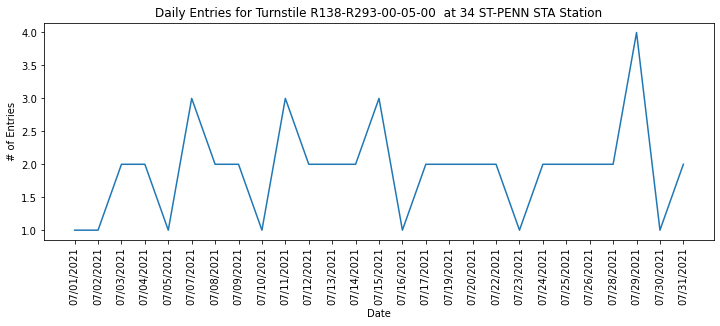

In [70]:
plt.figure(figsize=(12,4))
plt.plot(single_turnstile1['DATE'], single_turnstile1['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title('Daily Entries for Turnstile R138-R293-00-05-00  at 34 ST-PENN STA Station'); 

#### 34 ST-HERALD SQ 

In [58]:
specific_st2=turnstiles_daily[turnstiles_daily['STATION'] == '34 ST-HERALD SQ'] 
specific_st2.head() 

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE,WEEK,MONTH
7190,A022,R022,01-00-00,34 ST-HERALD SQ,06/27/2021,28885221,06/26/2021,28884056.0,1165.0,A022-R022-01-00-00,Sunday,June
7191,A022,R022,01-00-00,34 ST-HERALD SQ,06/28/2021,28886827,06/27/2021,28885221.0,1606.0,A022-R022-01-00-00,Monday,June
7192,A022,R022,01-00-00,34 ST-HERALD SQ,06/29/2021,28888530,06/28/2021,28886827.0,1703.0,A022-R022-01-00-00,Tuesday,June
7193,A022,R022,01-00-00,34 ST-HERALD SQ,06/30/2021,28890262,06/29/2021,28888530.0,1732.0,A022-R022-01-00-00,Wednesday,June
7194,A022,R022,01-00-00,34 ST-HERALD SQ,07/01/2021,28891952,06/30/2021,28890262.0,1690.0,A022-R022-01-00-00,Thursday,July


In [59]:
#grouping data by stations and data to find a sum of daily entries 
specific_st2 = (specific_st2.groupby(['TURNSTILE','DATE','STATION'])['DAILY_ENTRIES'].sum().reset_index())  

specific_st2.head()  

,TURNSTILE,DATE,STATION,DAILY_ENTRIES
0,A022-R022-01-00-00,06/27/2021,34 ST-HERALD SQ,1165.0
1,A022-R022-01-00-00,06/28/2021,34 ST-HERALD SQ,1606.0
2,A022-R022-01-00-00,06/29/2021,34 ST-HERALD SQ,1703.0
3,A022-R022-01-00-00,06/30/2021,34 ST-HERALD SQ,1732.0
4,A022-R022-01-00-00,07/01/2021,34 ST-HERALD SQ,1690.0


In [60]:
#grouping the data  by TURNSTILE to find of a sum of daily entires for top 10 TURNSTILE 
top5_TURNSTILE2= (specific_st2.groupby(['TURNSTILE'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .TURNSTILE.head())
top5_TURNSTILE2 

39    N506-R022-00-05-05
38    N506-R022-00-05-04
0     A022-R022-01-00-00
2     A022-R022-01-00-02
6     A025-R023-01-00-01
Name: TURNSTILE, dtype: object

In [61]:
top5_TURNSTILE2 = specific_st2[specific_st2['TURNSTILE'].isin(top5_TURNSTILE2)] 

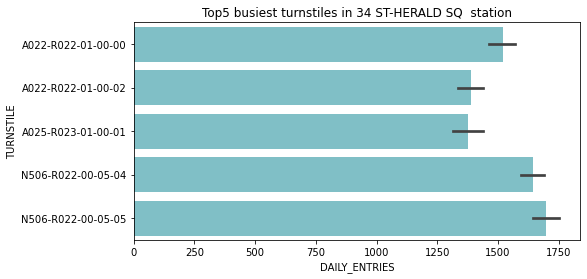

In [64]:
plt.figure(figsize=(8,4))
sns.barplot(data=top5_TURNSTILE2, x ='DAILY_ENTRIES',y ='TURNSTILE',color='#74C9D2')
plt.title('Top5 busiest turnstiles in 34 ST-HERALD SQ  station');

In [63]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE,WEEK,MONTH
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427,06/26/2021,7593116.0,311.0,A002-R051-02-00-00,Sunday,June
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979,06/27/2021,7593427.0,552.0,A002-R051-02-00-00,Monday,June
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528,06/28/2021,7593979.0,549.0,A002-R051-02-00-00,Tuesday,June
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154,06/29/2021,7594528.0,626.0,A002-R051-02-00-00,Wednesday,June
5,A002,R051,02-00-00,59 ST,07/01/2021,7595703,06/30/2021,7595154.0,549.0,A002-R051-02-00-00,Thursday,July
...,...,...,...,...,...,...,...,...,...,...,...,...
454389,TRAM2,R469,00-03-01,RIT-ROOSEVELT,09/21/2021,3145579,09/20/2021,3145409.0,170.0,TRAM2-R469-00-03-01,Tuesday,September
454390,TRAM2,R469,00-03-01,RIT-ROOSEVELT,09/22/2021,3145724,09/21/2021,3145579.0,145.0,TRAM2-R469-00-03-01,Wednesday,September
454391,TRAM2,R469,00-03-01,RIT-ROOSEVELT,09/23/2021,3145834,09/22/2021,3145724.0,110.0,TRAM2-R469-00-03-01,Thursday,September
454392,TRAM2,R469,00-03-01,RIT-ROOSEVELT,09/24/2021,3145994,09/23/2021,3145834.0,160.0,TRAM2-R469-00-03-01,Friday,September


In [71]:
single_turn2 = turnstiles_daily[(turnstiles_daily["STATION"] == "34 ST-HERALD SQ")&
                                (turnstiles_daily["TURNSTILE"] == "N506-R022-00-05-05")&
                                (turnstiles_daily["MONTH"] == "July")]                                  
                            
single_turn2.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE,WEEK,MONTH
219205,N506,R022,00-05-05,34 ST-HERALD SQ,07/01/2021,2449806,06/30/2021,2448124.0,1682.0,N506-R022-00-05-05,Thursday,July
219206,N506,R022,00-05-05,34 ST-HERALD SQ,07/02/2021,2451833,07/01/2021,2449806.0,2027.0,N506-R022-00-05-05,Friday,July
219207,N506,R022,00-05-05,34 ST-HERALD SQ,07/03/2021,2453274,07/02/2021,2451833.0,1441.0,N506-R022-00-05-05,Saturday,July
219208,N506,R022,00-05-05,34 ST-HERALD SQ,07/04/2021,2454710,07/03/2021,2453274.0,1436.0,N506-R022-00-05-05,Sunday,July
219209,N506,R022,00-05-05,34 ST-HERALD SQ,07/05/2021,2456197,07/04/2021,2454710.0,1487.0,N506-R022-00-05-05,Monday,July


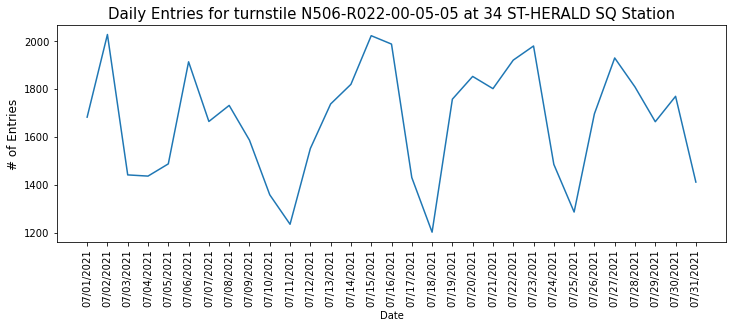

In [72]:
plt.figure(figsize=(12,4))
plt.plot(single_turn2['DATE'], single_turn2['DAILY_ENTRIES'])
plt.ylabel('# of Entries',fontsize=12)
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title('Daily Entries for turnstile N506-R022-00-05-05 at 34 ST-HERALD SQ Station',fontsize=15);

# Random STATION just to show the daily entries in general

In [327]:
single_turnstile = turnstiles_daily[(turnstiles_daily["C/A"] == "A011") & 
(turnstiles_daily["UNIT"] == "R080") & 
(turnstiles_daily["SCP"] == "01-00-00") & 
(turnstiles_daily["STATION"] == "57 ST-7 AV")&
(turnstiles_daily["MONTH"] == "September") ]                                  
                            

single_turnstile.head()  

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE,WEEK,MONTH
3161,A011,R080,01-00-00,57 ST-7 AV,09/01/2021,506825,08/31/2021,506665.0,160.0,A011-R080-01-00-00,Wednesday,September
3162,A011,R080,01-00-00,57 ST-7 AV,09/02/2021,506944,09/01/2021,506825.0,119.0,A011-R080-01-00-00,Thursday,September
3163,A011,R080,01-00-00,57 ST-7 AV,09/03/2021,507115,09/02/2021,506944.0,171.0,A011-R080-01-00-00,Friday,September
3164,A011,R080,01-00-00,57 ST-7 AV,09/04/2021,507248,09/03/2021,507115.0,133.0,A011-R080-01-00-00,Saturday,September
3165,A011,R080,01-00-00,57 ST-7 AV,09/05/2021,507381,09/04/2021,507248.0,133.0,A011-R080-01-00-00,Sunday,September


Text(0.5, 1.0, 'Daily Entries for Turnstile A011/R080/01-00-00 at 57 ST-7 AV Station')

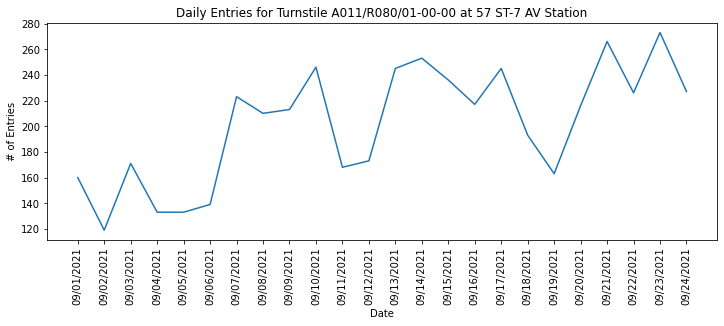

In [328]:
plt.figure(figsize=(12,4))
plt.plot(single_turnstile['DATE'], single_turnstile['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title('Daily Entries for Turnstile A011/R080/01-00-00 at 57 ST-7 AV Station') 


In [307]:
# grouping data by date to find a sum of daily entries 
byDate = turnstiles_daily.groupby('DATE')['DAILY_ENTRIES'].sum().reset_index() 

In [308]:
byDate['byMil'] = (byDate['DAILY_ENTRIES']/1000000).round(decimals=3) 
byDate

,DATE,DAILY_ENTRIES,byMil
0,06/27/2021,1266656.0,1.267
1,06/28/2021,1915443.0,1.915
2,06/29/2021,2203382.0,2.203
3,06/30/2021,1978733.0,1.979
4,07/01/2021,1959453.0,1.959
...,...,...,...
85,09/20/2021,2581047.0,2.581
86,09/21/2021,2499571.0,2.500
87,09/22/2021,2510407.0,2.510
88,09/23/2021,2522195.0,2.522


# I want to analyze each month separately

In [ ]:
july = (turnstiles_mta.DATE_TIME >= '2021-07-1') & (turnstiles_mta.DATE_TIME <= '2021-07-31')
turnstiles_mta[july]

In [ ]:
aug = (turnstiles_mta.DATE_TIME >= '2021-08-1') & (turnstiles_mta.DATE_TIME <= '2021-08-31')
turnstiles_mta[aug]

In [ ]:
sep = (turnstiles_mta.DATE_TIME >= '2021-09-1') & (turnstiles_mta.DATE_TIME <= '2021-09-30')
turnstiles_mta[sep]

**And now we start exploring the data 
1-filter for 5  stations 

In [309]:
'''
Filtering times : 
'12:00:00' = data from 7-12 am
'16:00:00' = data from 12 am - 4 pm 
'20:00:00' = data from 4 pm - 8 pm
'''
Penn_Station = '34 ST-PENN STA'


selected_times = ('12:00:00', '16:00:00','20:00:00') 

In [310]:
station_and_time_filter = turnstiles_mta[(turnstiles_mta['STATION']== '34 ST-PENN STA') & turnstiles_mta.TIME.isin(selected_times)]
station_and_time_filter.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE
140165,R141,R031,00-06-00,34 ST-PENN STA,123,IRT,09/24/2021,20:00:00,1893145,216278,2021-09-24 20:00:00,R141-R031-00-06-00
140164,R141,R031,00-06-00,34 ST-PENN STA,123,IRT,09/24/2021,16:00:00,1892727,216248,2021-09-24 16:00:00,R141-R031-00-06-00
140163,R141,R031,00-06-00,34 ST-PENN STA,123,IRT,09/24/2021,12:00:00,1892452,216226,2021-09-24 12:00:00,R141-R031-00-06-00
140159,R141,R031,00-06-00,34 ST-PENN STA,123,IRT,09/23/2021,20:00:00,1892211,216178,2021-09-23 20:00:00,R141-R031-00-06-00
140158,R141,R031,00-06-00,34 ST-PENN STA,123,IRT,09/23/2021,16:00:00,1891784,216154,2021-09-23 16:00:00,R141-R031-00-06-00


In [311]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE,WEEK,MONTH
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427,06/26/2021,7593116.0,311.0,A002-R051-02-00-00,Sunday,June
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979,06/27/2021,7593427.0,552.0,A002-R051-02-00-00,Monday,June
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528,06/28/2021,7593979.0,549.0,A002-R051-02-00-00,Tuesday,June
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154,06/29/2021,7594528.0,626.0,A002-R051-02-00-00,Wednesday,June
5,A002,R051,02-00-00,59 ST,07/01/2021,7595703,06/30/2021,7595154.0,549.0,A002-R051-02-00-00,Thursday,July


In [312]:
turnstiles_daily.groupby(['STATION'])['DAILY_ENTRIES'].mean() 

STATION
1 AV                366.911923
103 ST              714.419836
103 ST-CORONA      1131.332919
104 ST              212.847042
110 ST              641.755597
                      ...     
WOODLAWN            608.984444
WORLD TRADE CTR     269.330827
WTC-CORTLANDT       131.744622
YORK ST            1212.636364
ZEREGA AV           231.541667
Name: DAILY_ENTRIES, Length: 379, dtype: float64

# SQL

In [73]:
from sqlalchemy import create_engine
import pandas as pd 

In [74]:
engine = create_engine('sqlite://' , echo=False) 

In [75]:
turnstiles_mta.to_sql("mta_r",con=engine) 

In [76]:
mta_data = pd.read_sql('SELECT * FROM mta_r ORDER BY STATION limit 10;', engine) 
mta_data

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE
0,33805,H008,R248,01-00-04,1 AV,L,BMT,09/24/2021,20:00:00,450137,52587,2021-09-24 20:00:00.000000,H008-R248-01-00-04
1,33804,H008,R248,01-00-04,1 AV,L,BMT,09/24/2021,16:00:00,449640,52551,2021-09-24 16:00:00.000000,H008-R248-01-00-04
2,33803,H008,R248,01-00-04,1 AV,L,BMT,09/24/2021,12:00:00,449190,52517,2021-09-24 12:00:00.000000,H008-R248-01-00-04
3,33802,H008,R248,01-00-04,1 AV,L,BMT,09/24/2021,08:00:00,448974,52452,2021-09-24 08:00:00.000000,H008-R248-01-00-04
4,33801,H008,R248,01-00-04,1 AV,L,BMT,09/24/2021,04:00:00,448912,52420,2021-09-24 04:00:00.000000,H008-R248-01-00-04
5,33800,H008,R248,01-00-04,1 AV,L,BMT,09/24/2021,00:00:00,448866,52405,2021-09-24 00:00:00.000000,H008-R248-01-00-04
6,33799,H008,R248,01-00-04,1 AV,L,BMT,09/23/2021,20:00:00,448680,52373,2021-09-23 20:00:00.000000,H008-R248-01-00-04
7,33798,H008,R248,01-00-04,1 AV,L,BMT,09/23/2021,16:00:00,448205,52336,2021-09-23 16:00:00.000000,H008-R248-01-00-04
8,33797,H008,R248,01-00-04,1 AV,L,BMT,09/23/2021,12:00:00,447763,52318,2021-09-23 12:00:00.000000,H008-R248-01-00-04
9,33796,H008,R248,01-00-04,1 AV,L,BMT,09/23/2021,08:00:00,447549,52265,2021-09-23 08:00:00.000000,H008-R248-01-00-04


In [82]:
mta_data = pd.read_sql('SELECT STATION, COUNT(DISTINCT ENTRIES) FROM mta_r GROUP BY STATION limit 10;', engine) 
mta_data

,STATION,COUNT(DISTINCT ENTRIES)
0,1 AV,10895
1,103 ST,8062
2,103 ST-CORONA,4863
3,104 ST,4325
4,110 ST,3063
5,111 ST,7339
6,116 ST,11382
7,116 ST-COLUMBIA,3166
8,121 ST,2761
9,125 ST,21408


In [83]:
mta_data = pd.read_sql('SELECT  COUNT(DISTINCT TURNSTILE ), STATION  FROM mta_r GROUP BY STATION ;', engine) 
mta_data 

,COUNT(DISTINCT TURNSTILE ),STATION
0,24,1 AV
1,15,103 ST
2,9,103 ST-CORONA
3,9,104 ST
4,6,110 ST
...,...,...
374,5,WOODLAWN
375,18,WORLD TRADE CTR
376,35,WTC-CORTLANDT
377,3,YORK ST


In [102]:
mta_data = pd.read_sql('SELECT COUNT(DISTINCT STATION )  FROM mta_r ;', engine) 
mta_data  

,COUNT(DISTINCT STATION )
0,379


In [89]:
turnstiles_daily.to_sql("mta_r2",con=engine)  

In [93]:
mta_data2 = pd.read_sql('SELECT * FROM mta_r2 GROUP BY STATION ORDER BY WEEK limit 10;', engine) 
mta_data2

,index,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE,WEEK,MONTH
0,155868,N181A,R464,00-05-00,AQUEDUCT RACETR,07/09/2021,67109632,07/08/2021,14.0,14.0,N181A-R464-00-05-00,Friday,July
1,236205,N547,R420,01-04-00,DITMAS AV,07/02/2021,875,07/01/2021,872.0,3.0,N547-R420-01-04-00,Friday,July
2,194381,N335,R158,01-00-00,KEW GARDENS,07/02/2021,16000260,07/01/2021,15999749.0,511.0,N335-R158-01-00-00,Friday,July
3,37833,B023,R211,01-05-00,KINGS HWY,07/09/2021,889,07/08/2021,888.0,1.0,B023-R211-01-05-00,Friday,July
4,196929,N338,R128,01-05-00,SUTPHIN BLVD,07/02/2021,1763,07/01/2021,1762.0,1.0,N338-R128-01-05-00,Friday,July
5,104266,N022,R332,02-05-00,135 ST,09/13/2021,117440865,09/12/2021,117440864.0,1.0,N022-R332-02-05-00,Monday,September
6,238329,N554,R423,01-04-00,AVENUE N,08/02/2021,134217964,08/01/2021,134217963.0,1.0,N554-R423-01-04-00,Monday,August
7,143569,N111,R284,00-00-00,CLINTON-WASH AV,06/28/2021,2215368,06/27/2021,2215171.0,197.0,N111-R284-00-00-00,Monday,June
8,142659,N110,R283,00-00-00,LAFAYETTE AV,06/28/2021,18866,06/27/2021,18813.0,53.0,N110-R283-00-00-00,Monday,June
9,275467,PTH19,R549,02-00-00,NEWARK C,06/28/2021,22082,06/27/2021,22043.0,39.0,PTH19-R549-02-00-00,Monday,June


In [96]:
mta_data2 = pd.read_sql('SELECT MAX(DAILY_ENTRIES), STATION FROM mta_r2 GROUP BY STATION ;', engine) 
mta_data2

,MAX(DAILY_ENTRIES),STATION
0,1514.0,1 AV
1,1749.0,103 ST
2,2696.0,103 ST-CORONA
3,772.0,104 ST
4,1450.0,110 ST
...,...,...
374,1277.0,WOODLAWN
375,32777.0,WORLD TRADE CTR
376,752.0,WTC-CORTLANDT
377,1786.0,YORK ST


In [99]:
mta_data2 = pd.read_sql('SELECT MAX(DAILY_ENTRIES) FROM mta_r2 WHERE STATION == "34 ST-PENN STA" ;', engine) 
mta_data2 

,MAX(DAILY_ENTRIES)
0,196292.0
